<a href="https://colab.research.google.com/github/Baldros/Project-Music/blob/main/ChecandoRuido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparação:

In [ ]:
!pip install ipython
!pip install librosa

In [ ]:
import IPython
import librosa
import numpy as np

In [ ]:
audio = "teste.wav"
IPython.display.Audio(audio)

# Análise:

In [ ]:
# Transformando audio em um objeto do Librosa:
y, sr = librosa.load(audio)

In [ ]:
print(y,type(y),y.shape)

[7.1991235e-07 4.7292560e-06 4.9872324e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] <class 'numpy.ndarray'> (611612,)


In [ ]:
print(sr,type(sr))

22050 <class 'int'>


In [ ]:
S = np.abs(librosa.stft(y))
comps, acts = librosa.decompose.decompose(S, n_components=16)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [ ]:
print(comps,comps.shape)

[[0.0000000e+00 0.0000000e+00 4.4994964e-03 ... 5.0597161e-04
  0.0000000e+00 5.7239402e-03]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 3.2283447e-03]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.1826956e-03 1.1243665e-03]
 ...
 [4.4350011e-07 1.7026159e-07 5.4793382e-08 ... 4.6040416e-08
  8.8689049e-08 4.4062162e-08]
 [3.7964614e-07 1.5953941e-07 4.7427790e-08 ... 4.4039972e-08
  8.1714504e-08 2.9677231e-08]
 [4.4854733e-07 9.3694382e-08 4.3730779e-08 ... 3.1578967e-08
  5.8715589e-08 3.4761801e-08]] (1025, 16)


In [ ]:
print(acts,acts.shape)

[[0.02448549 0.07131464 0.10311353 ... 0.         0.         0.        ]
 [0.11915416 0.19597702 0.23324113 ... 0.         0.         0.        ]
 [0.02727984 0.08770338 0.09887718 ... 0.         0.         0.        ]
 ...
 [0.4738432  0.6404343  0.29534405 ... 0.         0.         0.        ]
 [0.04960622 0.0783986  0.05922146 ... 0.         0.         0.        ]
 [0.09735505 0.10230972 0.11151899 ... 0.         0.         0.        ]] (16, 1195)


# Visualizações:

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def spectrogam(s,comp,act):
  layout = [list(".AAAA"), list("BCCCC"), list(".DDDD")]
  fig, ax = plt.subplot_mosaic(layout, constrained_layout=True)
  librosa.display.specshow(librosa.amplitude_to_db(s, ref=np.max),
                           y_axis='log', x_axis='time', ax=ax['A'])
  ax['A'].set(title='Input spectrogram')
  ax['A'].label_outer()
  librosa.display.specshow(librosa.amplitude_to_db(comp,
                                                   ref=np.max),
                           y_axis='log', ax=ax['B'])
  ax['B'].set(title='Components')
  ax['B'].label_outer()
  ax['B'].sharey(ax['A'])
  librosa.display.specshow(act, x_axis='time', ax=ax['C'], cmap='gray_r')
  ax['C'].set(ylabel='Components', title='Activations')
  ax['C'].sharex(ax['A'])
  ax['C'].label_outer()
  S_approx = comps.dot(acts)
  img = librosa.display.specshow(librosa.amplitude_to_db(S_approx,
                                                         ref=np.max),
                                 y_axis='log', x_axis='time', ax=ax['D'])
  ax['D'].set(title='Reconstructed spectrogram')
  ax['D'].sharex(ax['A'])
  ax['D'].sharey(ax['A'])
  ax['D'].label_outer()
  fig.colorbar(img, ax=list(ax.values()), format="%+2.f dB")

  plt.show()

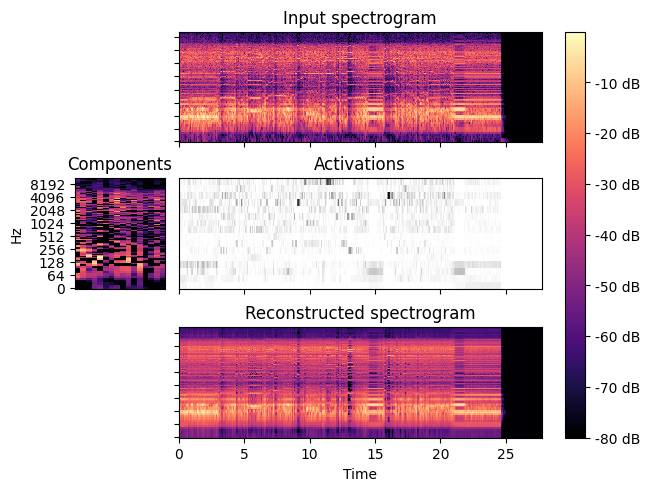

In [ ]:
spectrogam(S,comps,acts)

In [ ]:
librosa.effects.split(y)

array([[     0, 815782]])

# Separando o Ruido:

In [ ]:
from sklearn.decomposition import FastICA

In [ ]:
yteste=y.reshape(-1,1)

In [ ]:
# Aplique o ICA para tentar separar as fontes
ica = FastICA(n_components=2)
sources = ica.fit_transform(yteste)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:589: UserWarning: n_components is too large: it will be set to 1
  warnings.warn(


In [ ]:
sources

array([[ 4.3932907e-08],
       [ 2.8869886e-07],
       [ 3.0446329e-06],
       ...,
       [-1.6939186e-11],
       [-1.6939186e-11],
       [-1.6939186e-11]], dtype=float32)

In [ ]:
sources.shape

(611612, 1)

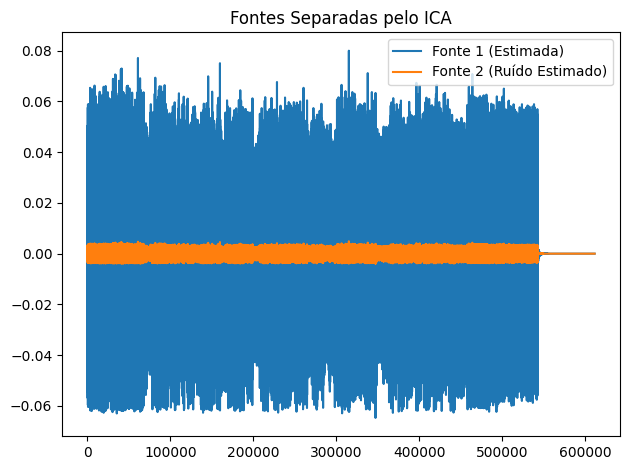

In [ ]:
plt.title('Fontes Separadas pelo ICA')
plt.plot(y, label='Fonte 1 (Estimada)')
plt.plot(sources, label='Fonte 2 (Ruído Estimado)')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
final = yteste - sources/1000

In [ ]:
final.shape

(611612, 1)

In [ ]:
import soundfile as sf

In [ ]:
sf.write('arquivo_final.wav', final, sr, 'PCM_24')

# Analisando o Arquivo Final:

In [ ]:
arq_teste = "arquivo_final.wav"
IPython.display.Audio(arq_teste)

In [ ]:
y1 , sr1 = librosa.load(arq_teste)

In [ ]:
S1 = np.abs(librosa.stft(y1))
comps1, acts1 = librosa.decompose.decompose(S, n_components=16)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


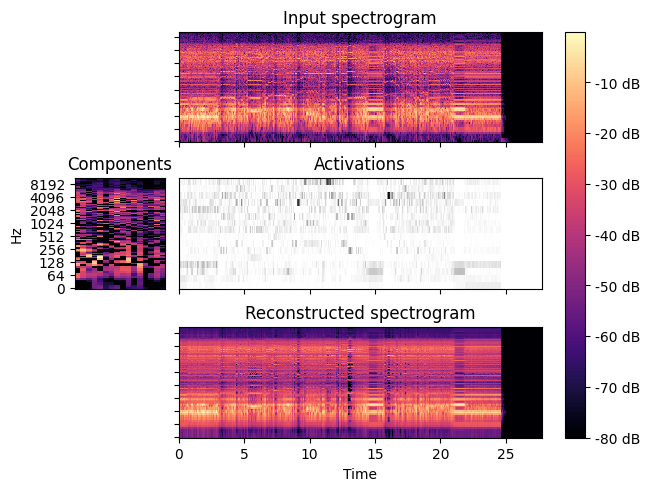

In [ ]:
spectrogam(S1,comps1,acts1)

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(y);df

,0
0,7.199124e-07
1,4.729256e-06
2,4.987232e-05
3,1.781471e-04
4,3.917636e-04
...,...
611607,0.000000e+00
611608,0.000000e+00
611609,0.000000e+00
611610,0.000000e+00


In [ ]:
df.describe()

,0
count,6.116120e+05
mean,2.774692e-10
std,2.094520e-02
min,-6.473516e-02
25%,-1.360817e-02
50%,0.000000e+00
75%,1.335037e-02
max,7.999686e-02


In [ ]:
df = df.mask(df >0.000000e+00, 0);df

,0
0,0.000000e+00
1,0.000000e+00
2,0.000000e+00
3,0.000000e+00
4,0.000000e+00
...,...
611607,-2.664535e-15
611608,-2.664535e-15
611609,-2.664535e-15
611610,-2.664535e-15


In [ ]:
yteste_2= df.values;yteste_2

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
sf.write('teste.wav', yteste_2, sr, 'PCM_24')

In [ ]:
arq_teste = "teste.wav"
IPython.display.Audio(arq_teste)